# Regularization (Lasso, Ridge, Elasticnet)

# Data Preparation

We will import and prepare a dataset and will use it for:
<br>
( i )  Feature Reduction using Regularization Methods
<br>
( ii )  Perform Predictive Modeling using Regularized Regression

### Importing Basic Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import metrics

### Importing Data

We use the "Boston" dataset that can be accessed using the sklearn package.

In [2]:
from sklearn.datasets import load_boston

In [3]:
BostonData = load_boston()

In [5]:
# The data Boston is provided under different keys.

print(BostonData.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
# The feature names in the Boston Dataset

print(BostonData.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Description of the Boston Dataset

print(BostonData.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
# Saving the Boston dataset's data as Pandas DataFrame from the data key (that has all the independent variables)

BosData = pd.DataFrame(BostonData.data)
BosData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Adding the feature names by using the feature_names key

BosData.columns = BostonData.feature_names
BosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Adding the dependent (Y) variable available in the target key

BosData['Price']=BostonData.target
BosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Performing Basic Checks

We look for the missing values in the dataset and the distribution of the Y variable

In [11]:
# No missing values in the dataset

BosData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

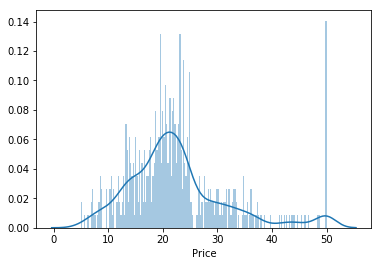

In [12]:
# Distribution of the Y variable seems close to normal

sns.distplot(BosData.Price,bins=200)

In [13]:
# Measuring the skewness in the Y variable's distribution

BosData['Price'].skew()

1.1080984082549072

In [14]:
# Measuring the kurtosis in the Y variable's distribution

BosData['Price'].kurtosis()

1.495196944165818

In [15]:
# Performing Log Transformation to check if it makes the distribution more normal 
BosData['ln_Price'] = np.log(BosData['Price'])

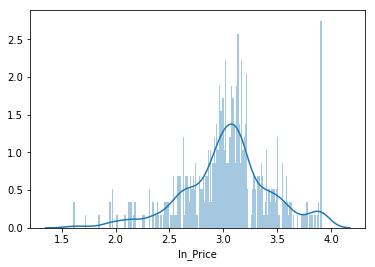

In [16]:
# Distribution of the log Y variable also seems close to normal

sns.distplot(BosData.ln_Price,bins=200)

In [17]:
# Measuring the skewness in the log Y variable's distribution
# The skewness in the log Y is less than Y (closer to 0) therefore we will proceed with log Y

BosData['ln_Price'].skew()

-0.33032129530987864

In [18]:
BosData.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price', 'ln_Price'],
      dtype='object')

In [23]:
# Creating Train and Test Dataset
X = BosData[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
Y = BosData['ln_Price']

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

# Using Regularization for performing Feature Reduction

In [25]:
from sklearn import linear_model

### Using Linear Regression to come up with the Coefficients

In [26]:
# Initializing Model

linreg_model = linear_model.LinearRegression()

In [27]:
# Fitting Model

linreg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
Non_Reg_coef = pd.DataFrame(linreg_model.coef_,X_train.columns,columns=['Non_Reg_Coefficient'])
Non_Reg_coef

,Non_Reg_Coefficient
CRIM,-0.010277
ZN,0.000792
INDUS,0.004594
CHAS,0.035459
NOX,-0.672618
RM,0.130099
AGE,0.000030
DIS,-0.042281
RAD,0.014007
TAX,-0.000698


### Using Ridge for performing Feature Reduction

In [29]:
# Initializing Model

Ridge = linear_model.Ridge(alpha=0.1)

In [30]:
# Fitting Model

Ridge.fit(X_train,Y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
# Finding the Coefficients

Ridge_coef = pd.DataFrame(Ridge.coef_,X_train.columns,columns=['Ridge_Coefficient'])
Ridge_coef

,Ridge_Coefficient
CRIM,-0.010247
ZN,0.000794
INDUS,0.004366
CHAS,0.034306
NOX,-0.611219
RM,0.130790
AGE,-0.000024
DIS,-0.041346
RAD,0.013813
TAX,-0.000702


### Using Lasso for performing Feature Reduction

In [32]:
# Initializing Model

Lasso = linear_model.Lasso(alpha=0.1)

In [33]:
# Fitting Model

Lasso.fit(X_train,Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
# Finding the Coefficients

lasso_coef = pd.DataFrame(Lasso.coef_,X_train.columns,columns=['Lasso_Coefficient'])
lasso_coef

,Lasso_Coefficient
CRIM,-0.006476
ZN,0.000387
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,0.000000
AGE,0.001297
DIS,-0.000000
RAD,0.004037
TAX,-0.000532


### Using Elastic Net for performing Feature Reduction

In [35]:
# Initializing Model

EN = linear_model.ElasticNet(alpha=0.1)

In [36]:
# Fitting Model

EN.fit(X_train,Y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
# Finding the Coefficients

elastic_coef = pd.DataFrame(EN.coef_,X_train.columns,columns=['Elastic_Net_Coefficient'])
elastic_coef

,Elastic_Net_Coefficient
CRIM,-0.007997
ZN,0.000524
INDUS,0.000000
CHAS,0.000000
NOX,-0.000000
RM,0.000000
AGE,0.001162
DIS,-0.009007
RAD,0.009255
TAX,-0.000664


### Comparing Coefficients

In [39]:
pd.concat([Non_Reg_coef,Ridge_coef,elastic_coef,lasso_coef,],axis=1)

,Non_Reg_Coefficient,Ridge_Coefficient,Elastic_Net_Coefficient,Lasso_Coefficient
CRIM,-0.010277,-0.010247,-0.007997,-0.006476
ZN,0.000792,0.000794,0.000524,0.000387
INDUS,0.004594,0.004366,0.000000,-0.000000
CHAS,0.035459,0.034306,0.000000,0.000000
NOX,-0.672618,-0.611219,-0.000000,-0.000000
RM,0.130099,0.130790,0.000000,0.000000
AGE,0.000030,-0.000024,0.001162,0.001297
DIS,-0.042281,-0.041346,-0.009007,-0.000000
RAD,0.014007,0.013813,0.009255,0.004037
TAX,-0.000698,-0.000702,-0.000664,-0.000532


<span style="color:brown"> <i> We can see that if we consider Lasso also known as the only true Feature Reduction method (using Regularization) as for other methods we require some arbitrarily decided threshold to reduce features (where if the feature's coefficient value is less than the predecided threshold value, the feature is dropped), we find 5 variables to be less useful and causing Multicollinearity. </i> </span>

These 5 variables are as follows:<br>
<span style="color:red">
(1) INDUS
<br>
(2) CHAS
<br>
(3) NOX
<br>
(4) RM
<br>
(5) DIS
</span>

<span style="color:brown"> <i> This way we are able to reduce the number of features from 13 to 8.</i> </span>


Therefore the features that can be selected for creating predictive models are:
<span style="color:green"><br>
(1) CRIM<br>
(2) ZN<br>
(3) AGE<br>
(4) RAD<br>
(5) TAX<br>
(6) PTRATIO<br>
(7) B<br>
(8) LSTAT
</span>

## Comparing Feature Reduction Technique
Comparing feature reduction performed by Regularization (in this case Lasso) with other Feature Reduction Technque such as Recursive Feature Elimination (RFE)

### Features Selcted by Lasso v/s RFE

In [45]:
# Importing Module for performing RFE

from sklearn.feature_selection import RFE

In [46]:
#  Initializing RFE model with using 8 as input to have the 8 most important features in the output.

rfe = RFE(linreg_model, 8)

In [47]:
# Fitting RFE Model

rfe = rfe.fit(X_train, Y_train)

In [48]:
# Printing the 8 selected Features

print('Selected features: %s' % list(X_train.columns[rfe.support_]))

Selected features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']


### Finding which set of features give better accuracy (using Decision Trees)

In [49]:
from sklearn.tree import DecisionTreeRegressor

#### Accuracy using Lasso dataset

In [50]:
# Creating Train and Test Dataset for Lasso

X_L = BosData[['CRIM','ZN','AGE','RAD','TAX','PTRATIO','B','LSTAT']]
Y = BosData['ln_Price']
X_L_train,X_L_test,Y_L_train,Y_L_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [51]:
# Initalizing and Fitting Decesion Tree Model on Lasso Selected features

DTR = DecisionTreeRegressor()
DTR.fit(X_L_train,Y_L_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [52]:
# Finding Accuracy on Test dataset

Pred_DTR_L = DTR.predict(X_L_test)
Lasso_Accuracy = metrics.r2_score(Y_L_test,Pred_DTR_L)
Lasso_Accuracy

0.6701538387162654

#### Accuracy using RFE dataset

In [53]:
# Creating Train and Test Dataset for RFE

X_RFE = BosData[['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']]
Y = BosData['ln_Price']
X_RFE_train,X_RFE_test,Y_RFE_train,Y_RFE_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [54]:
# Initalizing and Fitting Decesion Tree Model on RFE Selected features

DTR = DecisionTreeRegressor()
DTR.fit(X_RFE_train,Y_RFE_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [55]:
# Finding Accuracy on Test dataset

Pred_DTR_RFE = DTR.predict(X_RFE_test)
RFE_Accuracy = metrics.r2_score(Y_RFE_test,Pred_DTR_RFE)
RFE_Accuracy

0.6642459653650268

## Analysis

<span style="color:brown"> <i>The features that were selected using Regularization (Lasso) were : </span>
<span style="color:green"><br>
(1) CRIM<br>
(2) ZN<br>
(3) AGE<br>
(4) RAD<br>
(5) TAX<br>
(6) PTRATIO<br>
(7) B<br>
(8) LSTAT
</span>

<span style="color:brown"> <i> Whereas, the features selected using RFE came out to be : </i> </span>
<span style="color:blue"><br>
(1) **CRIM** <br>
(2) CHAS <br>
(3) NOX  <br>
(4) RM   <br>
(5) DIS <br> 
(6) **RAD** <br>
(7) **PTRATIO** <br>
(8) **LSTAT**  <br>
**(Common with Lasso)**
</span>


<span style="color:brown"> <i> The accuracy achieved from using the independent variables gained from Lasso and RFE came out to be almost same (RFE came slightly higher, while Lasso's performance can be increased by tuning the alpha value). Therefore, it is safe to say that Regularization techniques can be used as Feature Reduction method. </i> </span>

# Using Regularization for Model Building

We can bypass/avoid the feature reduction step when creating a predictive model using Regression. This can be achieved by performing regularization during model building only.

## Linear Regression (without Regularization)

In [56]:
# Initializing Model
linreg_model = linear_model.LinearRegression()

# Fitting Model
linreg_model.fit(X_train,Y_train)

# Predicting Values
pred_linmodel = linreg_model.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_noreg = round(metrics.r2_score(Y_test,pred_linmodel),3)

# Finding Coefficients
Non_Reg_coef = pd.DataFrame(linreg_model.coef_,X_train.columns,columns=['Non_Reg_Coefficient'])

# Reseting Index
Non_Reg_coef = Non_Reg_coef.reset_index()

# Renaming the columns
Non_Reg_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features = Non_Reg_coef[Non_Reg_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names=Selected_Features.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features = len(Selected_Features)


print('Accuracy achieved using Linear Regression (Non-Regularized is:',acc_noreg,"while the number of features used are",Number_of_Selected_Features,"with the selected features being",Selected_Features_names)

Accuracy achieved using Linear Regression (Non-Regularized is: 0.718 while the number of features used are 13 with the selected features being ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Linear Regression (Regularization : Ridge)

In [57]:
# Initializing Model
Ridge = linear_model.Ridge(alpha=0.1)

# Fitting Model
Ridge.fit(X_train,Y_train)

# Predicting Values
pred_linmodel_ridge = Ridge.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_ridge = round(metrics.r2_score(Y_test,pred_linmodel_ridge),3)

# Finding Coefficients
Ridge_coef = pd.DataFrame(Ridge.coef_,X_train.columns,columns=['Ridge_Coefficient'])

# Reseting Index
Ridge_coef = Ridge_coef.reset_index()

# Renaming the columns
Ridge_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Ridge = Ridge_coef[Ridge_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Ridge=Selected_Features_Ridge.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Ridge = len(Selected_Features_Ridge)


print('Accuracy achieved using Linear Regression (Regularization : Ridge) is:',acc_ridge,"while the number of features used are",Number_of_Selected_Features_Ridge,"with the selected features being",Selected_Features_names_Ridge)

Accuracy achieved using Linear Regression (Regularization : Ridge) is: 0.717 while the number of features used are 13 with the selected features being ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Linear Regression (Regularization : Lasso)

In [58]:
# Initializing Model
Lasso = linear_model.Lasso(alpha=0.07)

# Fitting Model
Lasso.fit(X_train,Y_train)

# Predicting Values
pred_linmodel_lasso = Lasso.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_lasso = round(metrics.r2_score(Y_test,pred_linmodel_lasso),3)

# Finding Coefficients
Lasso_coef = pd.DataFrame(Lasso.coef_,X_train.columns,columns=['Lasso_Coefficient'])

# Reseting Index
Lasso_coef = Lasso_coef.reset_index()

# Renaming the columns
Lasso_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Lasso = Lasso_coef[Lasso_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Lasso=Selected_Features_Lasso.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Lasso = len(Selected_Features_Lasso)


print('Accuracy achieved using Linear Regression (Regularization : Lasso) is:',acc_lasso,"while the number of features used are",Number_of_Selected_Features_Lasso,"with the selected features being",Selected_Features_names_Lasso)

Accuracy achieved using Linear Regression (Regularization : Lasso) is: 0.685 while the number of features used are 8 with the selected features being ['CRIM' 'ZN' 'AGE' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


## Linear Regression (Regularization : Elastic Net)

In [59]:
# Initializing Model
Elastic = linear_model.ElasticNet(alpha=0.1)

# Fitting Model
Elastic.fit(X_train,Y_train)

# Predicting Values
pred_linmodel_Elastic = Elastic.predict(X_test)

# Checking Accuracy (on Test dataset)
acc_Elastic = round(metrics.r2_score(Y_test,pred_linmodel_Elastic),3)

# Finding Coefficients
Elastic_coef = pd.DataFrame(Elastic.coef_,X_train.columns,columns=['Elastic_Coefficient'])

# Reseting Index
Elastic_coef = Elastic_coef.reset_index()

# Renaming the columns
Elastic_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Elastic = Elastic_coef[Elastic_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Elastic=Selected_Features_Elastic.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Elastic = len(Selected_Features_Elastic)


print('Accuracy achieved using Linear Regression (Regularization : Elastic) is:',acc_Elastic,"while the number of features used are",Number_of_Selected_Features_Elastic,"with the selected features being",Selected_Features_names_Elastic)

Accuracy achieved using Linear Regression (Regularization : Elastic) is: 0.697 while the number of features used are 9 with the selected features being ['CRIM' 'ZN' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


## Analysis

- <span style="color:brown"> <i> 71.9% Accuracy was achieved when all of the data was used for building a Linear Regression model that doesn't do any regularization. However, this can cause problems when dealing with Unseen data as the model may be overfitting due to multicollinearity. </i> </span>


- <span style="color:brown"> <i> 71.8% Accuracy when all the independent features were used for building a Linear Regression model that does Regularization using Ridge (L2 norm). Again, the problem of multicolliniearity persists as it uses all of the 13 variables to come up with predition and achieve 71% of accuracy. </i> </span>


- <span style="color:brown"> <i> 68.6% Accuracy was achieved when a Linear Regression model was built using all of the data. Here Lasso was used in order to penalize the coefficients which resulted in 5 variable's coefficients being dragged to 0 causing feature reduction. Only 8 features were used out of 13. Thus, at the cost of almost 3% of accuracy, we were able to get rid of almost 40% of the variables.</i> </span>


- <span style="color:brown"> <i> Almost 70% Accuracy was achieved when Elastic Net was used as the regularization method. Only 9 features were used to attain this level of accuracy while the remaining feature's coefficients were lowered down to 0. Here, at the cost of merely 2% of accuracy, we were able to get rid of almost 30% of all the independent the variables.</i> </span>


- <span style="color:brown"> <i> The performance of Lasso and Elastic Net can be increased by fine-tuning the alpha value (preferably by using Grid Search) whereas, for Ridge, appropriate threshold value can be chosen in order to perform feature reduction, however, in order to completely avoid feature reduction, Lasso and Elastic Net should be preferred as they make the coefficients value 0 thus directly performing feature reducing during model building. </i> </span>